In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tweets=pd.read_csv('covid19_tweets.csv')

In [ ]:
tweets.head()
tweets.describe()

In [3]:
tweets.isnull().sum().sort_values(ascending=False)

hashtags            51334
user_location       36771
user_description    10286
source                 77
user_name               0
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
is_retweet              0
dtype: int64

In [11]:
Categorical=tweets.select_dtypes(include=['object'])
Numerical=tweets.select_dtypes(exclude=['object'])

tweets['user_verified']=tweets['user_verified'].astype(int)
tweets['is_retweet']=tweets['is_retweet'].astype(int)
print(Numerical.head())

   user_followers  user_friends  user_favourites  user_verified  is_retweet
0             624           950            18775              0           0
1            2253          1677               24              1           0
2            9275          9525             7254              0           0
3             197           987             1488              0           0
4          101009           168              101              0           0


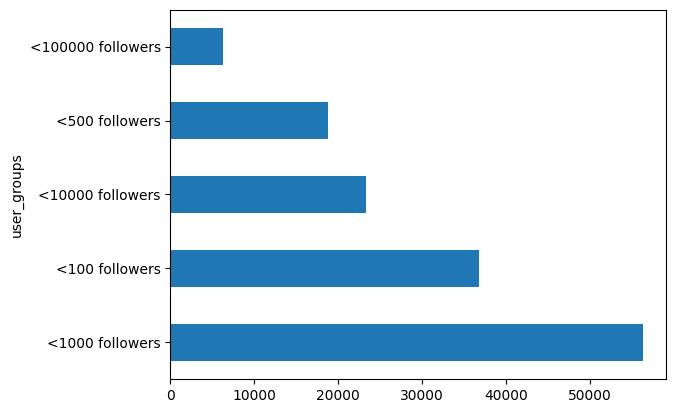

In [42]:
Numerical['user_groups']=pd.cut(Numerical['user_followers'], bins=[100, 500, 1000, 10000,100000, 1000000], labels=['<100 followers', '<500 followers', '<1000 followers', '<10000 followers', '<100000 followers'])
Numerical['user_groups'].value_counts().plot(kind='barh')
plt.show()


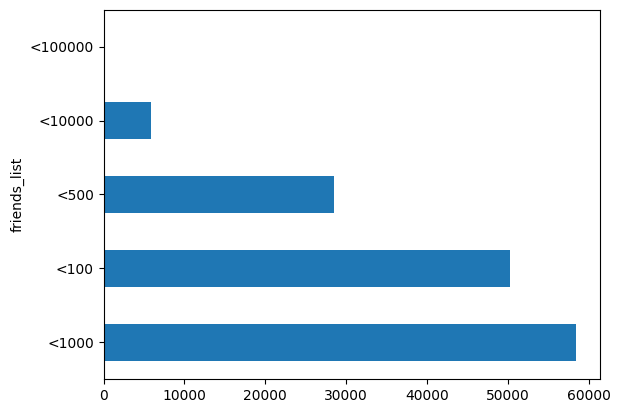

In [40]:
Numerical['friends_list']=pd.cut(Numerical['user_friends'], bins=[100,500,1000,10000,100000, 1000000], labels=['<100', '<500', '<1000', '<10000', '<100000'])
Numerical['friends_list'].value_counts().plot(kind='barh')
plt.show()

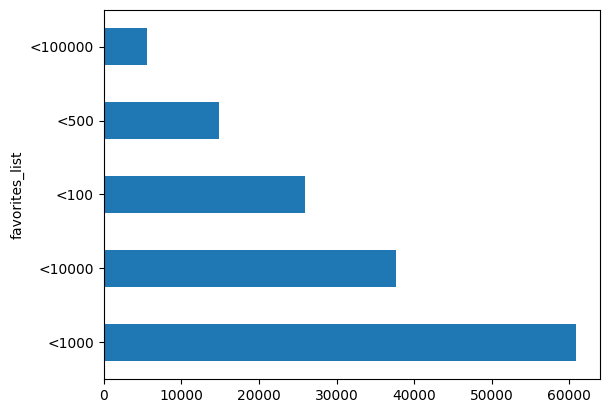

In [41]:
Numerical['favorites_list']=pd.cut(Numerical['user_favourites'], bins=[100,500,1000,10000,100000, 1000000], labels=['<100', '<500', '<1000', '<10000', '<100000'])
Numerical['favorites_list'].value_counts().plot(kind='barh')
plt.show()

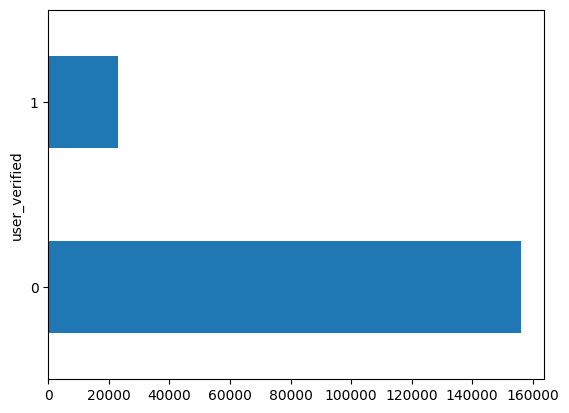

In [43]:
Numerical['user_verified'].value_counts().plot(kind='barh')
plt.show()

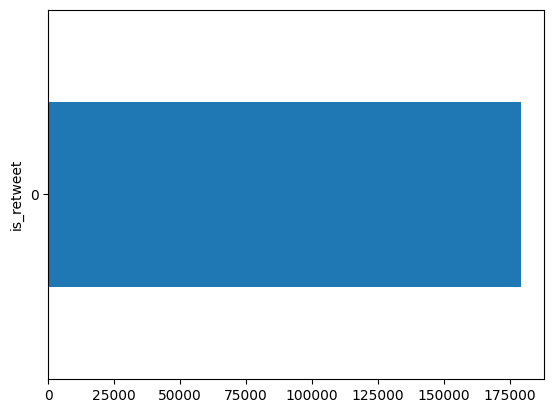

In [44]:
Numerical['is_retweet'].value_counts().plot(kind='barh')
plt.show()

In [50]:
tweets.drop(columns=['is_retweet'])

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,0,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,1,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,0,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,0,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,0,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android
...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,0,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,0,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,0,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,0,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone


In [57]:
base_numbers=tweets[['user_favourites','user_followers','user_friends','user_verified']].copy()
pearson=base_numbers.corr(method='pearson')
spearman=base_numbers.corr(method='spearman')


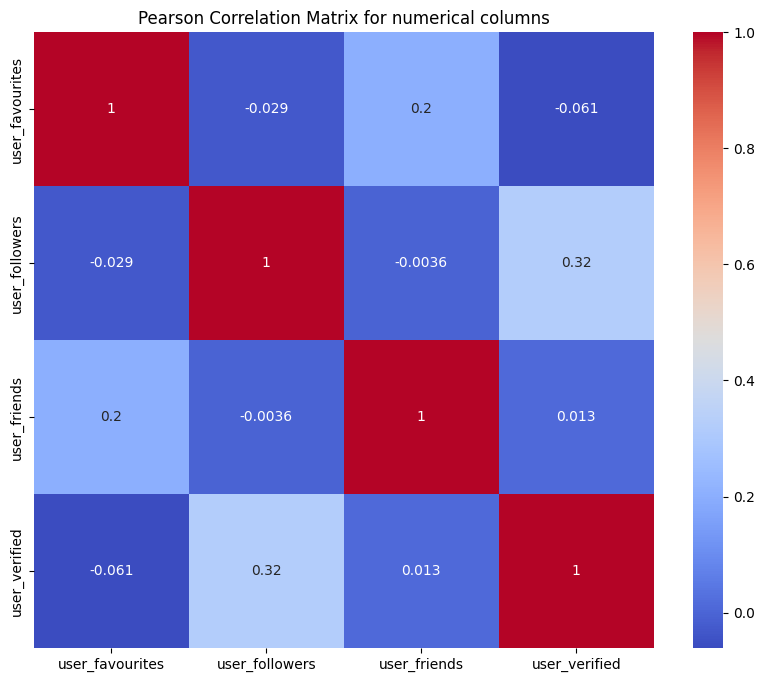

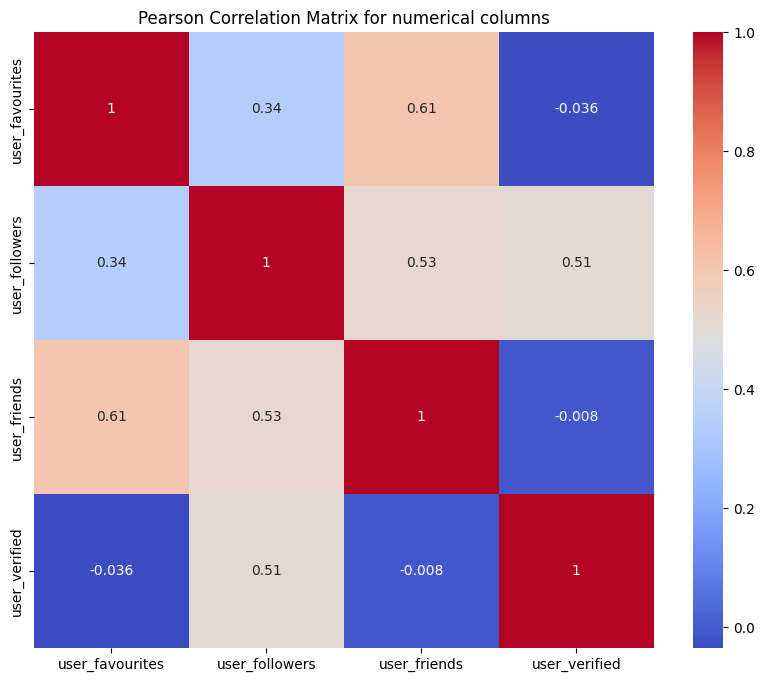

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(pearson, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix for numerical columns')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(spearman, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix for numerical columns')
plt.show()